In [2]:
import pandas as pd
import numpy as np
import time

In [3]:
df = pd.read_csv('fraud.csv', sep=",")

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train , test = train_test_split(df, test_size = 0.2, random_state = 42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]

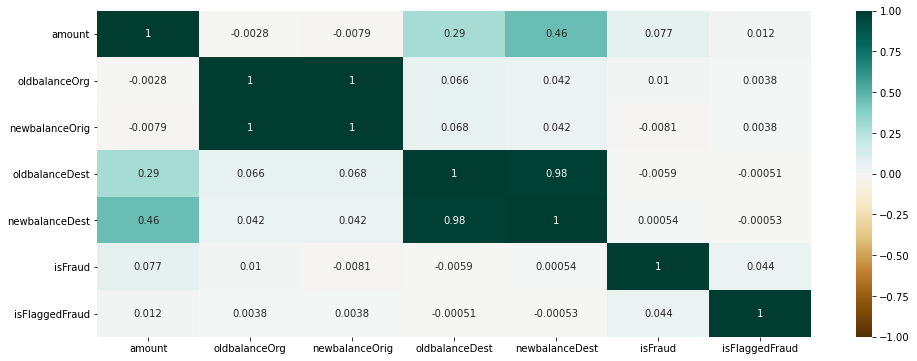

In [12]:
### From the Work Book
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [13]:
X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df.isFraud 

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
type_le = LabelEncoder()
type_labels = type_le.fit_transform(X['type'])
X['type_labels'] = type_labels

In [ ]:
# X_with_labels = X_without_step[['type', 'type_labels', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']]
# X_without_names = X_with_labels[['type', 'type_labels', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

In [17]:
type_creation = OneHotEncoder()
label_feature_arr = type_creation.fit_transform(
                              X[['type_labels']]).toarray()
gen_feature_labels = list(type_le.classes_)
generation_with_features = pd.DataFrame(label_feature_arr, 
                            columns=gen_feature_labels)

In [18]:
X_with_encoding = pd.concat([X, generation_with_features], axis=1)

In [19]:
X = X_with_encoding[['type', 'type_labels', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

In [20]:
X

,type,type_labels,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,3,0.0,0.0,0.0,1.0,0.0,9839.64,170136.00,160296.36,0.00,0.00
1,PAYMENT,3,0.0,0.0,0.0,1.0,0.0,1864.28,21249.00,19384.72,0.00,0.00
2,TRANSFER,4,0.0,0.0,0.0,0.0,1.0,181.00,181.00,0.00,0.00,0.00
3,CASH_OUT,1,0.0,1.0,0.0,0.0,0.0,181.00,181.00,0.00,21182.00,0.00
4,PAYMENT,3,0.0,0.0,0.0,1.0,0.0,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,1,0.0,1.0,0.0,0.0,0.0,339682.13,339682.13,0.00,0.00,339682.13
6362616,TRANSFER,4,0.0,0.0,0.0,0.0,1.0,6311409.28,6311409.28,0.00,0.00,0.00
6362617,CASH_OUT,1,0.0,1.0,0.0,0.0,0.0,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,TRANSFER,4,0.0,0.0,0.0,0.0,1.0,850002.52,850002.52,0.00,0.00,0.00


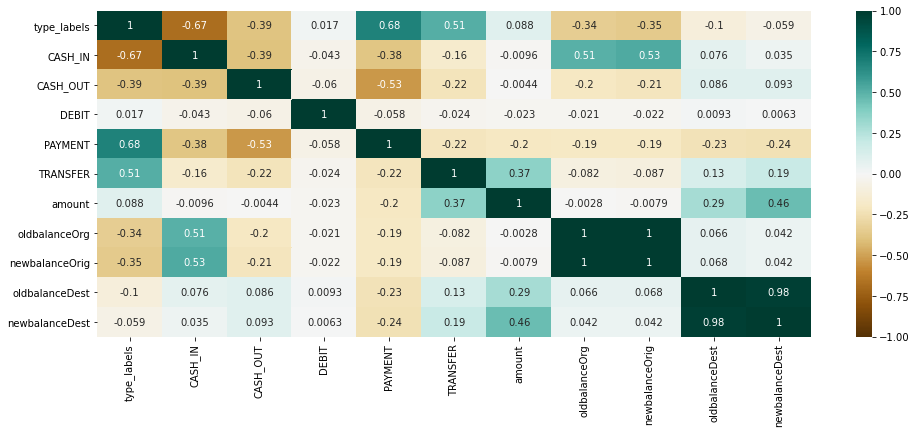

In [29]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [40]:
matches_per_labels = X.groupby('type').count()

In [49]:
test_2 = matches_per_labels['type_labels']

In [45]:
matches_per_labels.index

Index(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'], dtype='object', name='type')

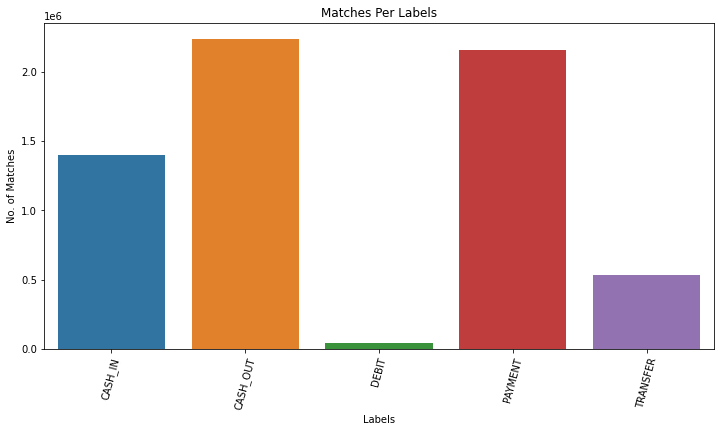

In [50]:
matches_per_labels = X.groupby('type').count()
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Matches Per Labels')
match_per_season_plot = sns.barplot(x = test_2.index, y = test_2)
match_per_season_plot.set(xlabel = 'Labels', ylabel = 'No. of Matches');

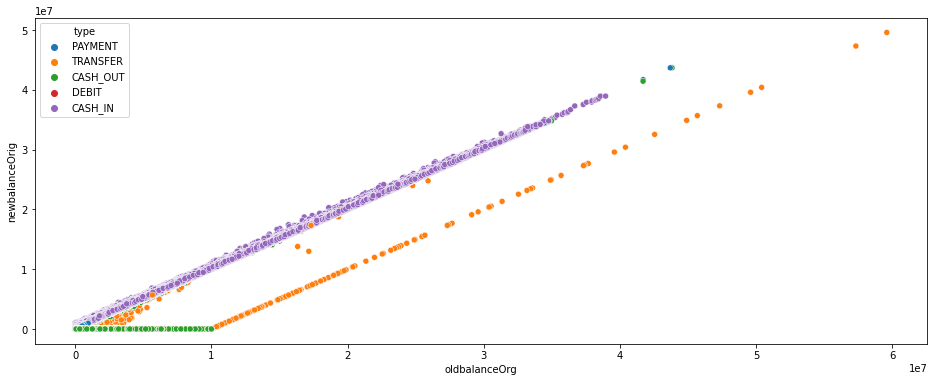

In [36]:

plt.figure(figsize=(16,6))
scatter_plot = sns.scatterplot(data = X, x = 'oldbalanceOrg', y = "newbalanceOrig", hue = 'type' )

In [1]:
X.hist(x,y = )

NameError: name 'X' is not defined

In [72]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42)

In [103]:
def number_of_values(array):
    unique, counts = np.unique(array, return_counts = True)
    print_out = dict(zip(unique, counts))
    return print_out

In [104]:
number_of_values(y_train)

{0: 5083503, 1: 6593}

In [105]:
number_of_values(y_test)

{0: 1270904, 1: 1620}

In [107]:
number_of_values(y)

{0: 6354407, 1: 8213}

# How would you define Machine Learning? 
I would define machine learning as the way in which computer programs learn from inputs of data. 

# Can You name four types of problems where it shines 
Problkems which exist solutions which require a lot of fine tuning or a long lisit of rules to go thorugh 
Complex Problems for which simpilar approahces do not work
Fluctation envoiroaents 
getting insight about complex prblems

# What is a labeled trianing set
A Lableed training set is a dataset which has the results attached to it. An example of this is the if you're looking at reviews of movies the label would be the review rating. 


# Can you name four of the main challenges in Machine Learning?
# If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?
# What is a test set and why would you want to use it?
# What is the purpose of a validation set?
# What can go wrong if you tune hyperparameters using the test set?
# What is cross-validation and why would you prefer it to a validation set?
